# Homework 2
***
**Name**: $<$insert name here$>$ 
***

This assignment is due on Canvas by **11:59 pm on Tuesday, September 19
th 2023**. Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. Your solutions to analysis questions should be done in Markdown directly below the associated question.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**.

The rules to be followed for the assignment are:

- Do **NOT** load or use any Python packages that are not available in [Anaconda for Python 3.9](https://docs.anaconda.com/anaconda/packages/pkg-docs/). 
- Some problems with code may be autograded.  If we provide a function or class API **do not** change it.
- Do not change the location of the data or data directory.  Use only relative paths to access the data. 

In [1]:
import pandas as pd
import numpy as np
import pickle

### [40 points] Problem 1
***

There are four functions that need to be completed:

#### normalization(fname, attr, normType, min_norm, max_norm)

- This function takes in the relative_path + dataset_name, the attribute name that has to be normalised (one of the values from `'Open','High','Low','Close/Last','Volume'`), and the type of normalization to be performed (`'min_max'` or `'z_score'`)

- Based on the normalization type that is provided, you will have to apply the appropriate formula and return a dictionary where `key = original_value` and  `value = normalised_value`

- For `min_max` normalization, `[min_norm, max_norm]` will be the normalized range. The defualt normalization range would be [0, 1]. Note that for `z_score` normalization, `min_norm` and `max_norm` will not be used. 

#### correlation (fname1, attr1, fname2, attr2)

- This function takes in the relative path + the name of the first data file, the attribute name that has to be used in the first file, the relative path + the name of the second data file,  and the attribute name that has to be used in the second file.

- This function calculates the **Pearson's r correlation coefficient** between the two attributes mentioned in the two files.

#### covariance (fname1, attr1, fname2, attr2)

- This function takes in the relative path + the name of the first data file, the attribute name that has to be used in the first file, the relative path + the name of the second data file,  and the attribute name that has to be used in the second file.

- This function calculates the **Covariance** between the two attributes mentioned in the two files.

#### chi_square_test (fname2, nominal_attr1, nominal_attr2)

- This function takes in the relative path + dataset_name, the name of a first nominal attribute, name of a second nominal attribute from the dataset.

- This function is used to perform a **Chi-square test** for correlation analysis between the two input attributes in the provided dataset. 

- Return the computed chi-squared statistic.

Note:
- All the data and testing files are already under folder `data`. **Please maintain this as it would be necessary while grading.**
- **Do not modify function `preprocess`.**
- **Do not change the variable names of the returned values.**
- If the test case fails, one way to debug is to see the output of the testing data and comparing it to your output.
- Initially the test case will fail as there is no code in the below two functions.
- You can assume there's no illegal input, so you do not need to do input error handling.


In [2]:
def preprocess(fname):
    '''
    A helper function provided to you to remove the $ symbols in the dataset and to convert data type for columns to float. 
    Input Parameters:
        fname: (string) relative path + the name of the csv file containing historical quotes
    Return:
        df: A pandas dataframe with $ symbol removed from columns and data type of columns converted to float
    '''
    
    df = pd.read_csv(fname)
    df.columns = df.columns.str.replace(' ', '', regex=True)
    
    columns = ["Close/Last", "Open", "High", "Low"]
    for column in columns:
        df[column] = df[column].str.replace('$', '', regex=True)
        df[column] = df[column].astype(float)
    
    return df

In [3]:
df=preprocess("data/test1.csv")
df.head()

,Date,Close/Last,Volume,Open,High,Low
0,08/31/2022,108.22,28626970,110.650,110.85,108.13
1,08/30/2022,108.94,27513260,110.170,110.50,107.80
2,08/29/2022,109.42,21191160,109.990,110.95,108.80
3,08/26/2022,110.34,37245700,114.720,115.12,110.19
4,08/25/2022,116.65,16956790,114.235,116.72,114.11


In [4]:
type(df['Volume'].tolist())

list

In [5]:
pd.__version__

'1.5.2'

In [6]:
from scipy.stats import zscore

def normalization (fname, attr, normType, min_norm=0, max_norm=1):
    '''
    Input Parameters:
        fname: (string) relative path + the name of the csv file containing historical quotes
        attr: (string) the name of attribute to be normalized 
        normType: (string) the type of normalization to be performed which can be either "min_max" or "z_score"
        min_norm, max_norm: (int) min and max value for the normalized range when normType is "min_max" (Default 0 and 1)
    Return:
        result: a dictionary where each key is the original column value and each value is the normalized column value. 
    '''
    # call the preprocess function to convert the data to float type and remove $ symbol in price column
    df = preprocess(fname) 
    result = {
    }
    #TODO: Perform the indicated normalization type and return a dictionary in the shape {original_value:normalized_value, ...}
    orig_values = df[attr].values.tolist()
    attr_max = max(orig_values)
    attr_min = min(orig_values)
    if normType == "min_max":
        for x in orig_values:
            norm_value = (x-attr_min)/(attr_max-attr_min) * (max_norm-min_norm) + min_norm
            result[x]=norm_value
    
    else:
        zscore_df = zscore(df[attr])
        norm_list = zscore_df.values.tolist()
        for x,y in zip(orig_values,norm_list):
            result[x] = y
    
    return result

In [7]:
def correlation (fname1, attr1, fname2, attr2):
    '''
    Input Parameters:
        fname1: (string) relative path + the name of the first csv file containing historical quotes
        attr1: (string) the name of attribute to consider in the first csv file (fname1)
        fname2: (string) relative path + the name of the second csv file containing historical quotes
        attr2: (string) the column name of attribute to consider in the second csv file (fname2)   
    Return:
        correlation_coefficient: (float in range -1 to + 1) Pearson's r correlation coefficient between attr1 in fname1 and attr2 in fname2
    '''
    

    df1 = preprocess(fname1)
    df2 = preprocess(fname2)
    correlation_coefficient = 0.0  
    #TODO: Write code to compute the Pearson's r correlation coefficient between attr1 in fname1 and attr2 in fname2.
    x_simple = df1[attr1].values.tolist()
    y_simple = df2[attr2].values.tolist()
    cor_coef_matrix = np.corrcoef(x_simple, y_simple)
    correlation_coefficient = cor_coef_matrix[0][1]
    
    return correlation_coefficient


In [8]:
def covariance (fname1, attr1, fname2, attr2):
    '''
    Input Parameters:
        fname1: (string) relative path + the name of the first csv file containing historical quotes
        attr1: (string) the name of attribute to consider in the first csv file (fname1)
        fname2: (string) relative path + the name of the second csv file containing historical quotes
        attr2: (string) the column name of attribute to consider in the second csv file (fname2)   
    Return:
        covariance: (float) Covariance between attr1 in fname1 and attr2 in fname2
    '''
    

    df1 = preprocess(fname1)
    df2 = preprocess(fname2)
    covariance = 0.0  
    #TODO: Write code to compute covariance between attr1 in fname1 and attr2 in fname2.

#     Sample solution 1
    # input_array1 = df1[attr1].values
    # input_array2 = df2[attr2].values
    # covariance = np.cov(input_array1, input_array2)[0, 1]
#     Sample solution 2
    covariance = df1[attr1].cov(df2[attr2])
    
    return covariance

In [9]:
from scipy.stats import chi2_contingency

def chi_square_test (fname, nominal_attr1, nominal_attr2):
    '''
    Input Parameters:
        fname: (string) relative path + name of the csv file of titanic dataset containing nominal data
        nominal_attr1: (string) the name of first nominal attribute
        nominal_attr2: (string) the name of second nominal attribute
    Return:
        chi2_stat: (float) The chi-squared statistic
    '''
    

    df = pd.read_csv(fname)
    chi2_stat = 0.0  
    
    print("DataFrame: ")
    display(df)
    #TODO Step 1: Create a contingency table / compute observed and expected frequencies for the two input attributes
    contingency_table = pd.crosstab(df[nominal_attr1], df[nominal_attr2])
    
    print("Crosstab: ")
    display(contingency_table)
    #TODO Step 2: Perform the chi-square test to compute chi-squared statistic
    chi2_stat, p_val, deg_of_freedom, exp_freq = chi2_contingency(contingency_table)
    print(deg_of_freedom)
    
    return chi2_stat

### [10 points] Problem 2
***

(a) Perform chi-square test for correlation analysis between categorical attributes "Pclass" and "Survived" in the data/titanic.csv dataset ([src](https://www.kaggle.com/competitions/titanic/data)).  

(b) Using the chi-square test result, answer the following question.   
For a significance level of **0.05**, can you reject the null hypothesis that the two attributes are independent? Explain briefly.
(Hint: Calculate the degrees of freedom and use the chi-square distribution table to get the critical value) 
![table](./data/chi-square-distribution-table.png)


In [10]:
# Just run this code block to complete (a)
titanic_data = "data/titanic.csv"
result = chi_square_test(titanic_data, "Pclass", "Survived")
print(result)

DataFrame: 


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Crosstab: 


Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


2
102.88898875696056


**Use above result to complete part (b).**   
Can you reject the null hypothesis? **Yes**   
Critical value = 5.99 for degrees of freedom = 2 and significance level = 0.05    
Computed value 102 > critical value of 5.99, hence we can reject the null hypothesis.

In [11]:
import unittest

class Test(unittest.TestCase):
    def setUp(self):
        self.loc1 = "data/test1.csv"
        self.loc2 = "data/test2.csv"
        file = open('data/test_normalization', 'rb')
        testing_normalization_data = pickle.load(file)
        self.min_norm, self.max_norm = testing_normalization_data[0]
        self.data_normalization = testing_normalization_data[1]
        file.close()
        file = open('data/test_zscore', 'rb')
        self.zscore = pickle.load(file)
        file = open('data/test_correlation', 'rb')
        self.data_correlation = pickle.load(file)
        file.close()
        file = open('data/test_covariance', 'rb')
        self.data_covariance = pickle.load(file)
        file.close()
        self.titanic_data = "data/titanic.csv"
        file = open('data/chi_square_test', 'rb')
        self.chi_square_stat = pickle.load(file)
        file.close()
        
    def test0(self):
        """
        Test min_max normalization
        """
        result = normalization(self.loc2, "High", "min_max", self.min_norm, self.max_norm)
        for key,value in self.data_normalization.items():
            self.assertAlmostEqual(result[key],value, places = 1)
            
    def test1(self):
        """
        Test zcore normalization
        """
        result = normalization(self.loc2, "Open", "z_score")
        for key, value in self.zscore.items():
            self.assertAlmostEqual(result[key], value, places = 1)
    
    def test2(self):
        """
        Test correlation coefficient
        """
        result = correlation(self.loc1, "Open", self.loc2, "Close/Last")
        self.assertAlmostEqual(result,self.data_correlation, places = 1)
        
    def test3(self):
        """
        Test covariance
        """
        result = covariance(self.loc1, "Open", self.loc2, "Close/Last")
        self.assertAlmostEqual(result,self.data_covariance, places = 1)
        
    def test4(self):
        """
        Test chi-square statistic
        """
        result = chi_square_test(self.titanic_data, "Pclass", "Embarked")
        self.assertAlmostEqual(result, self.chi_square_stat, places = 1)

tests = Test()
tests_to_run = unittest.TestLoader().loadTestsFromModule(tests)
unittest.TextTestRunner().run(tests_to_run)

....

DataFrame: 


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Crosstab: 


Embarked,C,Q,S
Pclass,,,
1,85,2,127
2,17,3,164
3,66,72,353


.
----------------------------------------------------------------------
Ran 5 tests in 0.074s

OK


4


<unittest.runner.TextTestResult run=5 errors=0 failures=0>

### [50 points] Problem 3
***

Using the VOO 5-year Historical Quotes dataset, plot the following: 

(a) A single plot showing the temporal change of the “High” and “Low” attributes. 

(b) A boxplot for the “Open” and “Close/Last” attributes. 

(c) The 10-bin equal-width histogram for the “Volume” attribute. 

(d) Any other plot that interests you (using this VOO dataset).

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
data = pd.read_csv('data/VOO-5year.csv')
data["Date"] = pd.to_datetime(data["Date"])

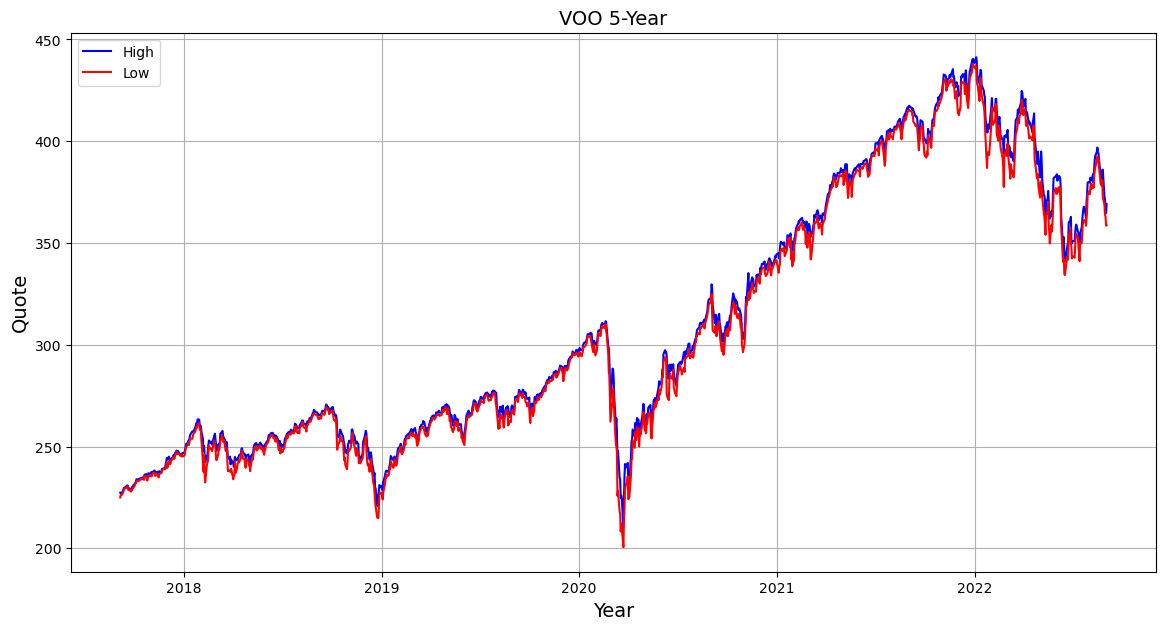

In [13]:
#TODO: use this cell to plot the temporal change of the "High" and "Low" attributes
# make sure to include graph legend to distinguish between the two lines 
# set plot size to 14" x 7"
plt.rc('figure', figsize = (14, 7))
# your code here 
# BEGIN
plt.title('VOO 5-Year', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Quote', fontsize=14)

plt.plot(data['Date'], data['High'], color='blue', label = "High")
plt.plot(data['Date'], data['Low'], color='red', label = "Low")
plt.legend(loc ="upper left")
plt.grid(True)
# END


plt.show()

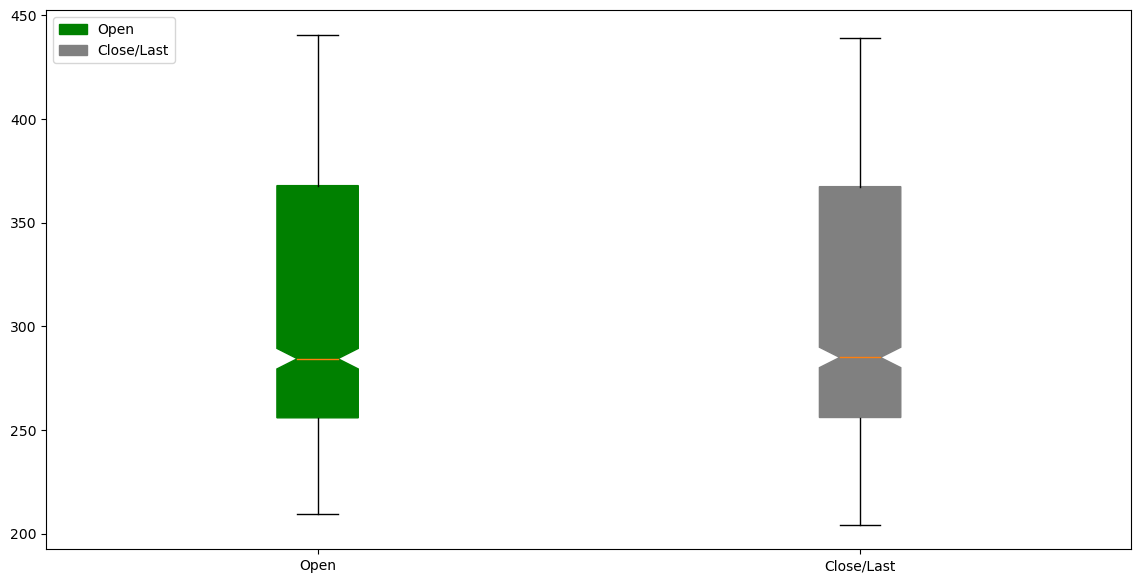

In [14]:
#TODO: use this cell to plot a boxplot for the “Open” and “Close/Last” attributes.
# make sure to include graph legend to distinguish between the two boxplots 

# your code here 
# BEGIN
boxp = plt.boxplot([data['Open'],data['Close/Last']],notch=True,patch_artist=True)
boxp['boxes'][0].set_color('green')
boxp['boxes'][1].set_color('grey')
boxp['boxes'][0].set_label('Open')
boxp['boxes'][1].set_label('Close/Last')
plt.xticks([1, 2], ['Open','Close/Last'])
plt.legend(loc ="upper left")

# END


plt.show()

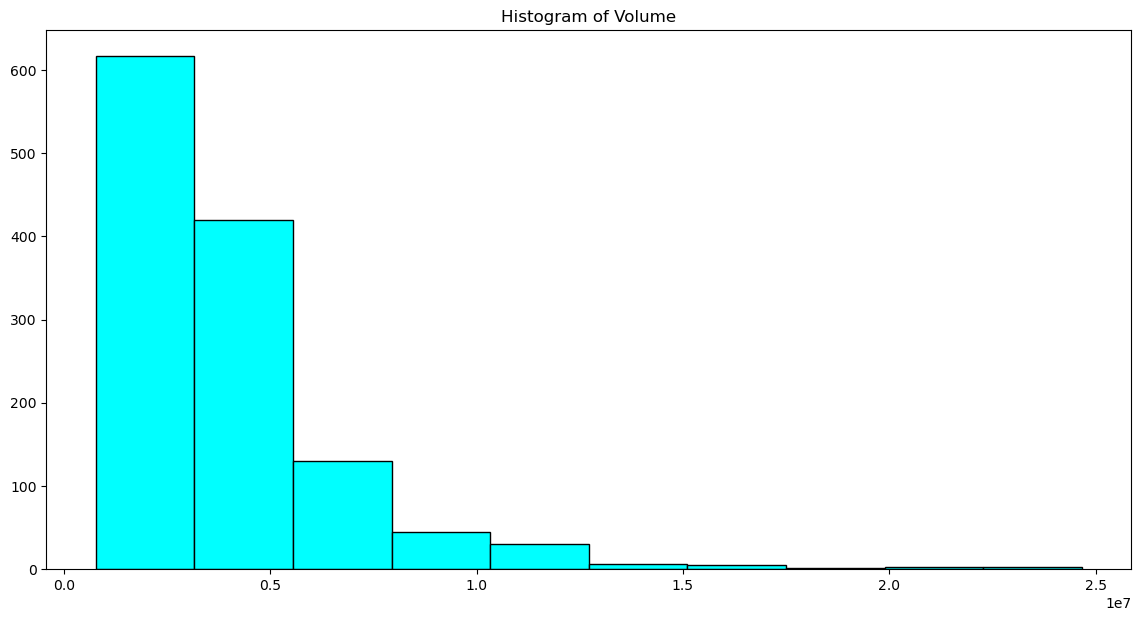

In [15]:
#TODO: use this cell to plot a 10-bin equal-width histogram for the “Volume” attribute. 
# your code here 
# BEGIN
x = data['Volume']
# Creating histogram
fig, ax = plt.subplots()
n, bins, patches = ax.hist(x, 10,edgecolor = "black",color="Aqua")
ax.set_title('Histogram of Volume') 
# END

plt.show()

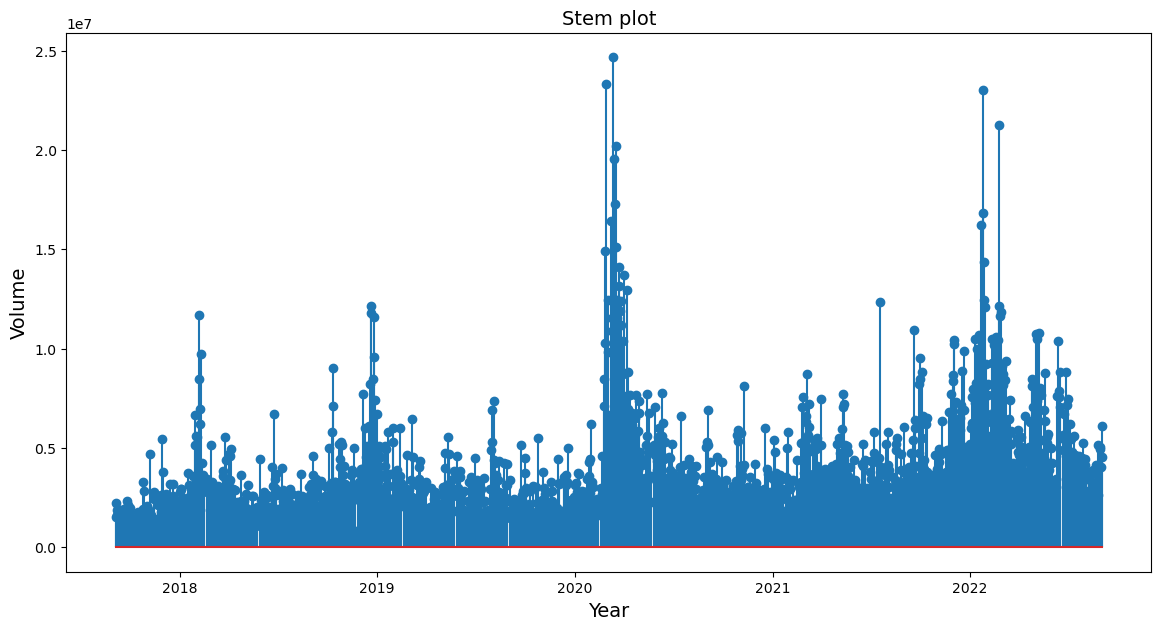

In [16]:
#TODO: use this cell to plot another graph of interest to you 
# your code here 
# BEGIN
plt.title('Stem plot', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Volume', fontsize=14)
plt.stem(data['Date'],data['Volume'])
# END

plt.show()